<h1 style='color: green; font-size: 36px; font-weight: bold;'>Regressão Linear - HousePricing</h1>

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Neste projeto, criei um modelo de machine learning usando a técnica de Regressão Linear para fazer previsões sobre os preços de imóveis com base em um conjunto de características conhecidas dos imóveis. Inicialmente, coletei dados de um conjunto disponível no Kaggle e criei uma amostra representativa para facilitar o desenvolvimento do modelo.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Area</b> - Área do imóvel em metros quadrados</li>
    <li><b>Garage</b> - Quantiade de vagas de garagem</li>
    <li><b>FirePlace</b> - Quantiade de lareiras</li>
    <li><b>Baths</b> - Quantiade de banheiros</li>
    <li><b>White Marble</b> - Acabamento em mármore branco?</li>
    <li><b>Black Marble</b> - Acabamento em mármore preto?</li>
    <li><b>Indian Marble</b> - Acabamento em mármore indiano?</li>
    <li><b>Floors</b> - Possui mais de um andar?</li>
    <li><b>City</b> - Cidade</li>
    <li><b>Solar</b> - Aquecimento solar?</li>
    <li><b>Electric</b> - Rede Elétrica?</li>
    <li><b>Fiber</b> - Fibra óptica?</li>
    <li><b>Glass Doors</b> - Portas de vidro?</li>
    <li><b>Swimming Pool</b> - Piscina?</li>
    <li><b>Garden</b> - Jardim?</li>
    <li><b>Prices</b> - Preços dos imóveis</li>
</ul>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Observação: </b>Nas variáveis categóricas (?), está atribuído "1" para "Sim" e "0" para "Não".</p>

## Leitura e Visualização dos dados

In [3]:
df = pd.read_csv('dados/Amostra-HousePrices_HalfMil.csv')

In [4]:
df.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,113,2,2,1,1,0,0,1,3,1,1,0,0,1,0,50575
1,55,3,4,2,1,0,0,1,2,0,0,1,1,0,0,64575
2,19,2,3,4,0,1,0,1,2,1,0,1,1,1,1,55175
3,206,3,2,2,0,1,0,1,1,0,0,0,0,0,1,38150
4,158,3,3,5,0,1,0,0,1,1,0,0,1,0,1,31150


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Area           5000 non-null   int64
 1   Garage         5000 non-null   int64
 2   FirePlace      5000 non-null   int64
 3   Baths          5000 non-null   int64
 4   White Marble   5000 non-null   int64
 5   Black Marble   5000 non-null   int64
 6   Indian Marble  5000 non-null   int64
 7   Floors         5000 non-null   int64
 8   City           5000 non-null   int64
 9   Solar          5000 non-null   int64
 10  Electric       5000 non-null   int64
 11  Fiber          5000 non-null   int64
 12  Glass Doors    5000 non-null   int64
 13  Swiming Pool   5000 non-null   int64
 14  Garden         5000 non-null   int64
 15  Prices         5000 non-null   int64
dtypes: int64(16)
memory usage: 625.1 KB


In [6]:
df.shape

(5000, 16)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [7]:
df.describe().round(2)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.0,5000.00,5000.0,5000.0,5000.00,5000.0,5000.0,5000.00,5000.00
mean,125.47,2.02,1.99,3.00,0.33,0.34,0.33,0.5,1.99,0.5,0.5,0.51,0.5,0.5,0.51,42092.82
std,71.85,0.81,1.42,1.41,0.47,0.47,0.47,0.5,0.82,0.5,0.5,0.50,0.5,0.5,0.50,12018.81
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.00,10400.00
25%,63.00,1.00,1.00,2.00,0.00,0.00,0.00,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.00,33525.00
50%,126.00,2.00,2.00,3.00,0.00,0.00,0.00,0.0,2.00,1.0,0.5,1.00,1.0,0.0,1.00,41725.00
75%,189.00,3.00,3.00,4.00,1.00,1.00,1.00,1.0,3.00,1.0,1.0,1.00,1.0,1.0,1.00,50600.00
max,249.00,3.00,4.00,5.00,1.00,1.00,1.00,1.0,3.00,1.0,1.0,1.00,1.0,1.0,1.00,75925.00


## Matriz de correlação

In [8]:
df.corr().round(4)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.0000,-0.0165,0.0011,-0.0109,0.0054,0.0052,-0.0106,0.0217,0.0094,0.0148,0.0090,-0.0046,0.0086,0.0183,0.0142,0.1660
Garage,-0.0165,1.0000,0.0155,0.0109,-0.0257,0.0039,0.0218,-0.0171,0.0140,0.0038,-0.0010,0.0086,-0.0100,0.0247,-0.0279,0.0839
FirePlace,0.0011,0.0155,1.0000,-0.0004,0.0012,0.0048,-0.0060,0.0016,-0.0156,-0.0100,0.0028,-0.0055,-0.0061,-0.0000,0.0156,0.0856
Baths,-0.0109,0.0109,-0.0004,1.0000,0.0000,0.0021,-0.0021,-0.0007,-0.0097,0.0027,-0.0313,-0.0061,-0.0044,-0.0123,-0.0135,0.1385
White Marble,0.0054,-0.0257,0.0012,0.0000,1.0000,-0.5008,-0.4972,0.0059,-0.0505,-0.0087,0.0085,-0.0147,0.0077,-0.0181,0.0159,0.4346
Black Marble,0.0052,0.0039,0.0048,0.0021,-0.5008,1.0000,-0.5019,0.0064,0.0322,0.0204,0.0097,0.0153,-0.0157,0.0036,0.0077,-0.0593
Indian Marble,-0.0106,0.0218,-0.0060,-0.0021,-0.4972,-0.5019,1.0000,-0.0123,0.0182,-0.0117,-0.0183,-0.0007,0.0081,0.0146,-0.0236,-0.3748
Floors,0.0217,-0.0171,0.0016,-0.0007,0.0059,0.0064,-0.0123,1.0000,0.0034,-0.0131,0.0140,-0.0063,0.0004,-0.0068,-0.0031,0.6285
City,0.0094,0.0140,-0.0156,-0.0097,-0.0505,0.0322,0.0182,0.0034,1.0000,0.0069,0.0294,0.0011,-0.0220,-0.0108,0.0017,0.2167
Solar,0.0148,0.0038,-0.0100,0.0027,-0.0087,0.0204,-0.0117,-0.0131,0.0069,1.0000,0.0312,0.0115,-0.0033,-0.0264,0.0026,0.0118


### Observações:

As variáveis "White Marble, "Indian Marble", "Floors", "Fiber" são as que possuem maiores correlações com "Prices"
* "White Marble" -> 0.43
* "Indian Marble" -> -0.37
* "Floors" -> 0.63
* "Fiber" -> 0.48

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

In [9]:
# estilo dos gráficos
sns.set_style("darkgrid")

## Box plot da variável *dependente* (y)

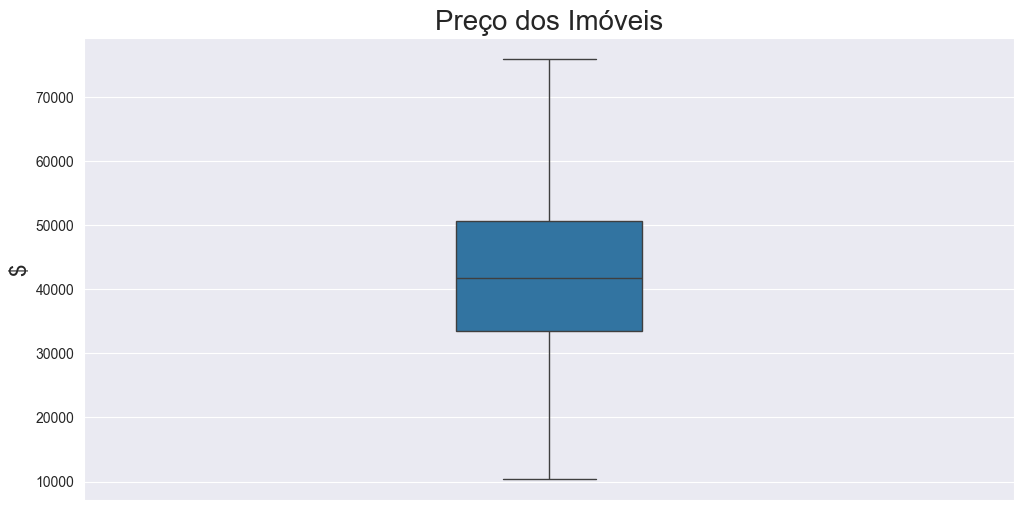

In [10]:
ax = sns.boxplot(df.Prices, orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
plt.show()

# Gráficos de dispersão entre as variáveis do dataset

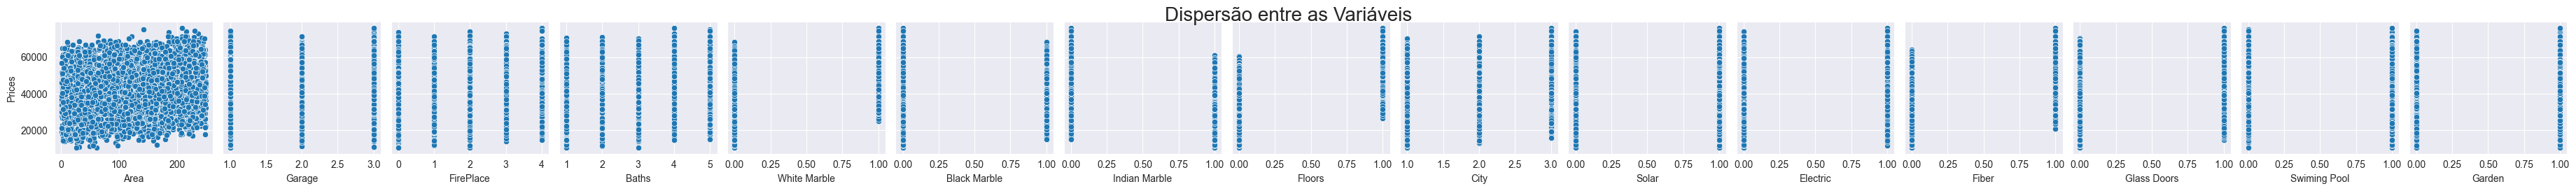

In [11]:
ax = sns.pairplot(df, y_vars='Prices', x_vars=[x for x in df.columns if x !='Prices'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
plt.show()

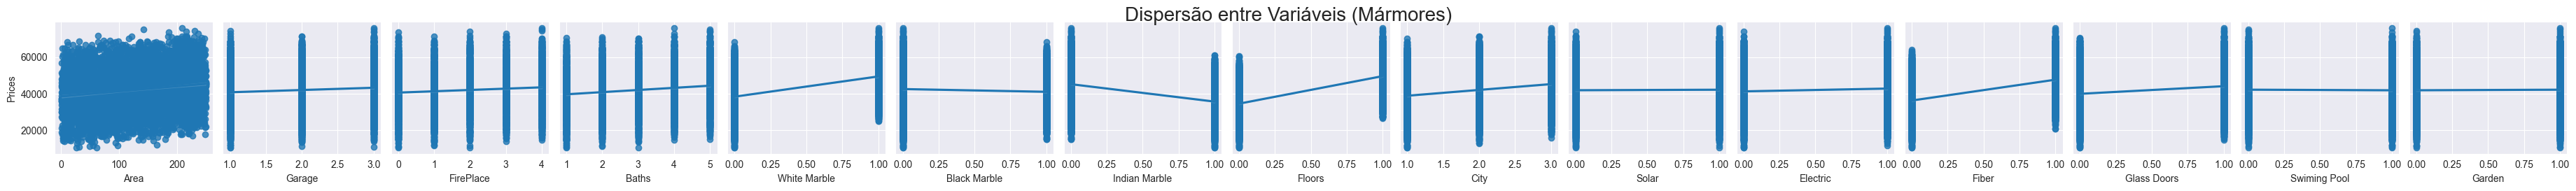

In [12]:
ax = sns.pairplot(df, y_vars='Prices', x_vars=[x for x in df.columns if x !='Prices'], kind='reg')
ax.fig.suptitle('Dispersão entre Variáveis (Mármores)', fontsize=20, y=1.05)
plt.show()

#### Há uma suspeita de que as variáveis 'Swimming Pool', 'Garden', 'Eletric', 'Solar' e 'Garage' não sejam úteis para o modelo.

# Investigando a variável *dependente* (y) juntamente com outras característica

### Box-plot (Preço X Cidade)

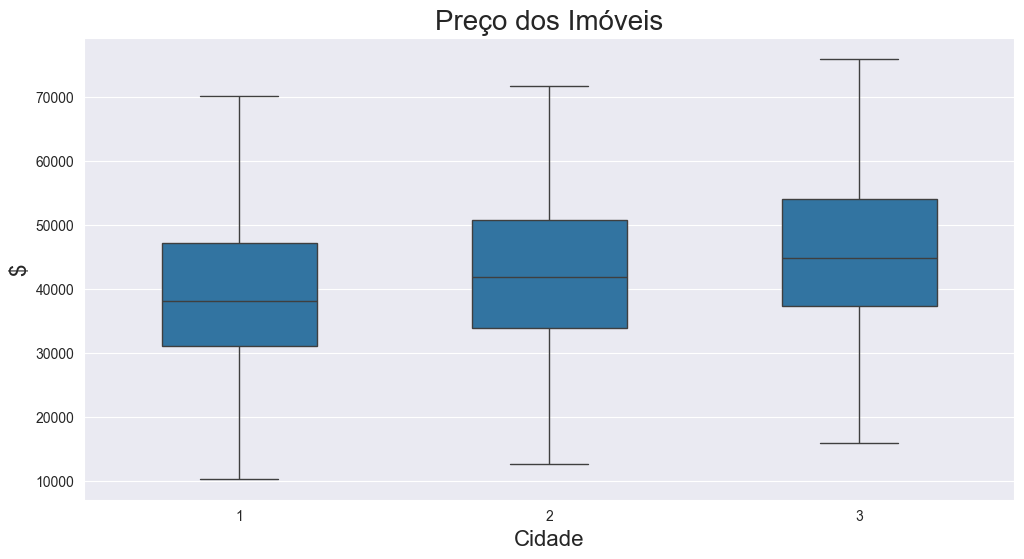

In [13]:
ax = sns.boxplot(y='Prices', x='City', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Cidade', fontsize=16)
plt.show()

### Box-plot (Preço X Acabamento em Mármore Branco)

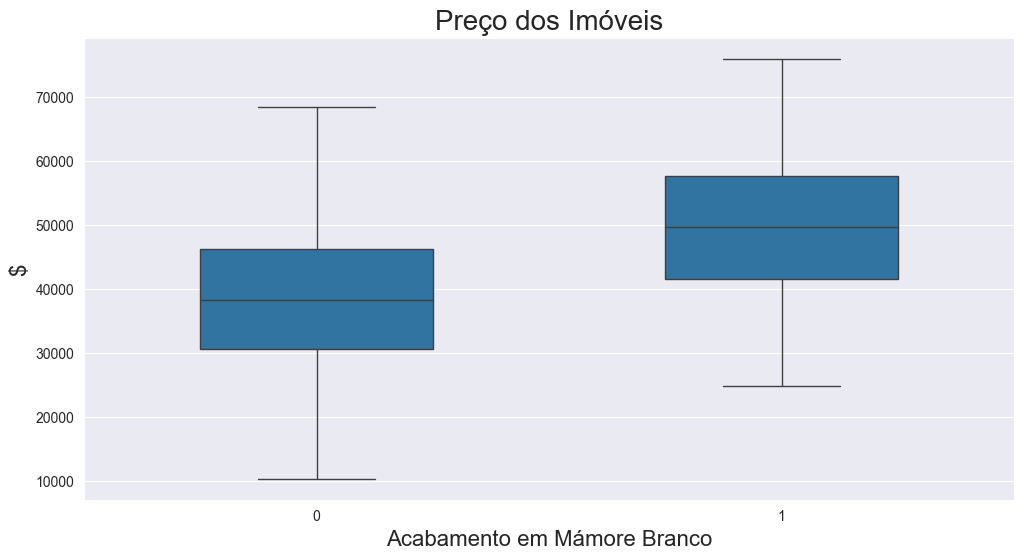

In [14]:
ax = sns.boxplot(y='Prices', x='White Marble', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Acabamento em Mámore Branco', fontsize=16)
plt.show()

### Box-plot (Preço X Acabamento em Mármore Indiano)

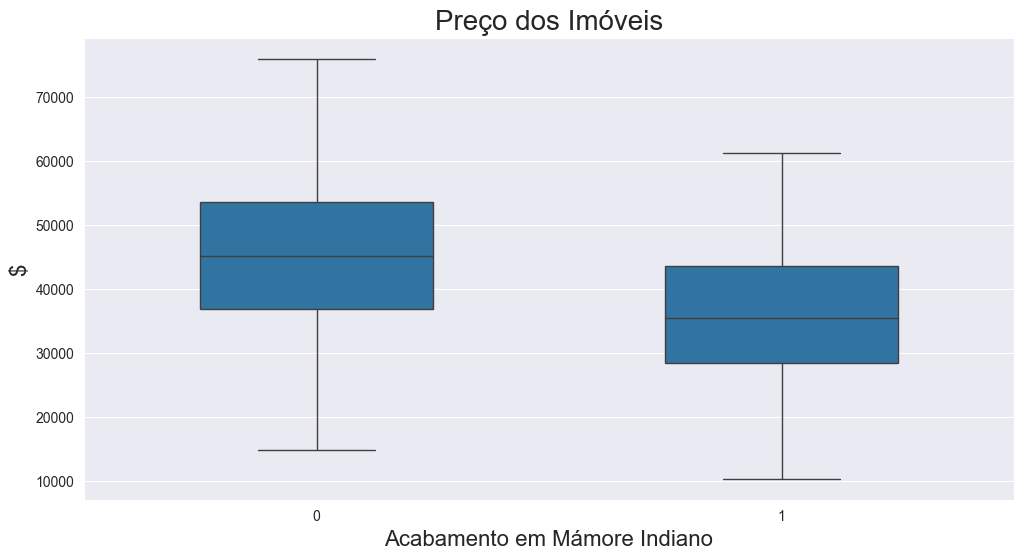

In [15]:
ax = sns.boxplot(y='Prices', x='Indian Marble', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Acabamento em Mámore Indiano', fontsize=16)
plt.show()

### Box-plot (Preço X Andares)

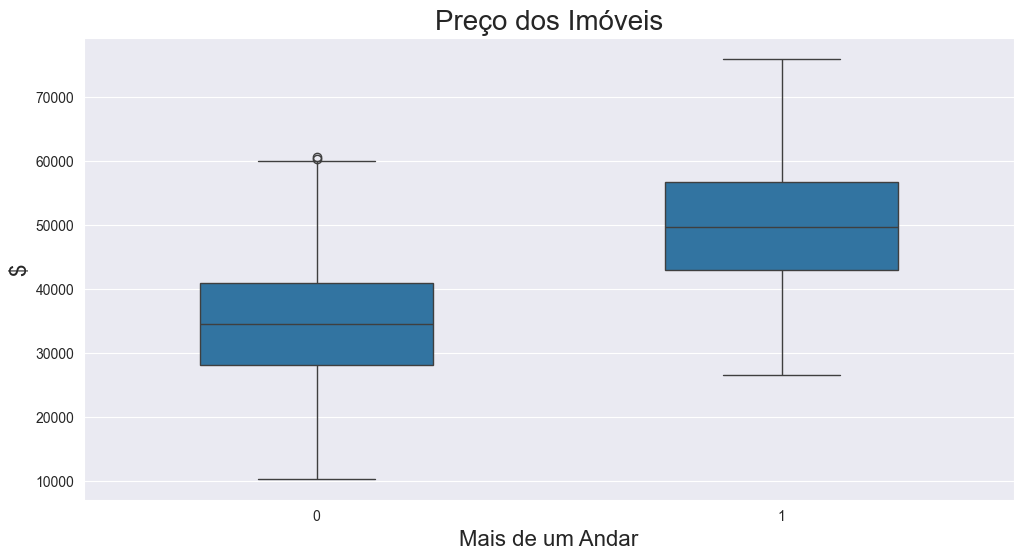

In [16]:
ax = sns.boxplot(y='Prices', x='Floors', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Mais de um Andar', fontsize=16)
plt.show()

### Box-plot (Preço X Fibra Óptica)

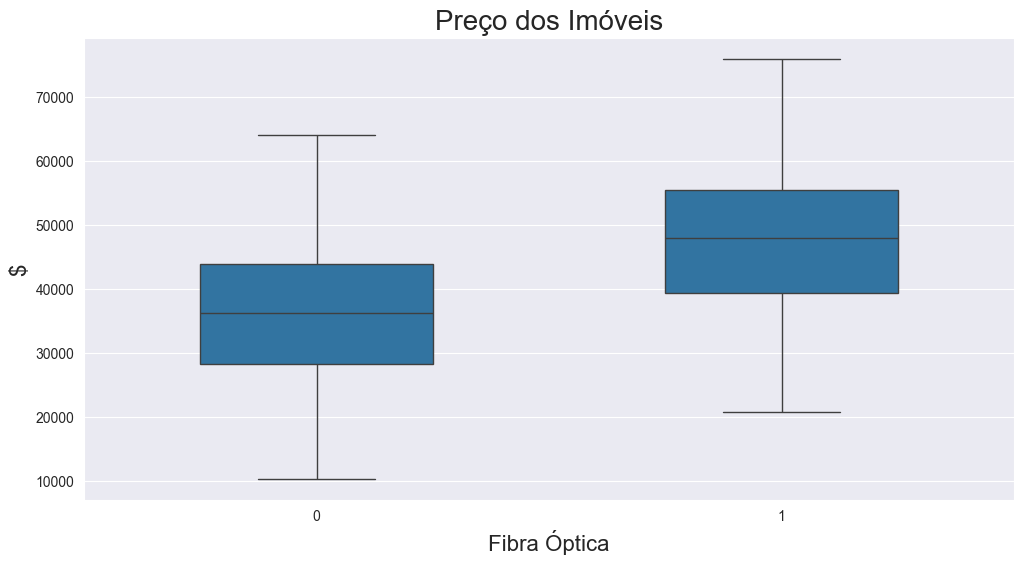

In [17]:
ax = sns.boxplot(y='Prices', x='Fiber', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Fibra Óptica', fontsize=16)
plt.show()

# Distribuição de frequências da variável *dependente* (Prices)

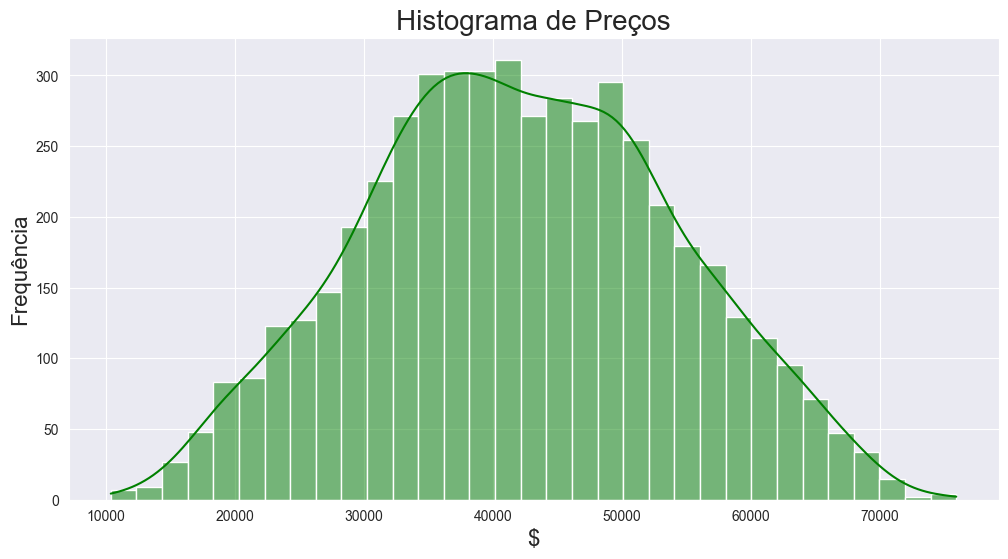

In [18]:
ax = sns.histplot(df.Prices, kde=True, color='green')
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma de Preços', fontsize=20)
ax.set_ylabel('Frequência', fontsize=16)
ax.set_xlabel('$', fontsize=16)

plt.show()

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

In [19]:
from sklearn.model_selection import train_test_split

## Variável dependente (y)

In [20]:
y = df.Prices
y.head()

0    50575
1    64575
2    55175
3    38150
4    31150
Name: Prices, dtype: int64

## Variáveis explicativas (X)

In [21]:
nomes_X = [col for col in df.columns if col != "Prices"]
X = df[nomes_X]
X.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden
0,113,2,2,1,1,0,0,1,3,1,1,0,0,1,0
1,55,3,4,2,1,0,0,1,2,0,0,1,1,0,0
2,19,2,3,4,0,1,0,1,2,1,0,1,1,1,1
3,206,3,2,2,0,1,0,1,1,0,0,0,0,0,1
4,158,3,3,5,0,1,0,0,1,1,0,0,1,0,1


## Datasets de treino e de teste

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2811)

## Estimando o modelo com statsmodels para análise de regressão linear

In [23]:
import statsmodels.api as sm
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Prices   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.998e+30
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:14:20   Log-Likelihood:                 71448.
No. Observations:                3350   AIC:                        -1.429e+05
Df Residuals:                    3335   BIC:                        -1.428e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5500.0000   9.47e-12   5.81e+14      0.000    5500.000    5500.000
Area             25.0000    3.2e-14    7.8e+14      0.000      25.000      25.000
Garage         1500.0000   2.83e-12    5.3e+14      0.000    1500.000    1500.000
FirePlace       750.0000   1.62e-12   4.64e+14      0.000     750.000     750.000
Baths          1250.0000   1.62e-12   7.72e+14      0.000    1250.000    1250.000
White Marble   9500.0000   4.45e-12   2.13e+15      0.000    9500.000    9500.000
Black Marble    500.0000   4.58e-12   1.09e+14      0.000     500.000     500.000
Indian Marble -4500.0000   4.54e-12  -9.91e+14      0.000   -4500.000   -4500.000
Floors           1.5e+04   4.58e-12   3.27e+15      0.000     1.5e+04     1.5e+04
City           3500.0000   2.82e-12   1.24e+15      0.000    3500.000    3500.000
Solar           250.0000   4.59e-12   5.44e+13      0.000     250.000     250.000
Electric       1250.0000   4.59e-12   2.72e+14      0.000    1250.000    1250.000
Fiber          1.175e+04   4.58e-12   2.56e+15      0.000    1.17e+04    1.18e+04
Glass Doors    4450.0000   4.58e-12   9.71e+14      0.000    4450.000    4450.000
Swiming Pool   5.684e-12   4.59e-12      1.238      0.216   -3.32e-12    1.47e-11
Garden         1.546e-11   4.59e-12      3.367      0.001    6.46e-12    2.45e-11
==============================================================================
Omnibus:                      998.654   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.256
Skew:                          -0.006   Prob(JB):                     3.19e-34
Kurtosis:                       1.949   Cond. No.                     1.47e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Pegando Variáveis para estimação

In [24]:
X = df[['Floors', 'City', 'Fiber', 'White Marble', 'Black Marble', 'Indian Marble']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [27]:
modelo = LinearRegression()

## Estimando o modelo linear

In [28]:
modelo.fit(X_train, y_train)

LinearRegression()

## Coeficiente de determinação (R²) do modelo estimado com os dados de Treino

In [29]:
print(f'R² = {(modelo.score(X_train, y_train).round(2))}')

R² = 0.9


## Previsões para os dados de Teste

In [30]:
y_previsto = modelo.predict(X_test)

## Coeficiente de determinação (R²) para as previsões do modelo

In [31]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.9


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Teste

In [32]:
X_test[0:1]

,Floors,City,Fiber,White Marble,Black Marble,Indian Marble
1006,1,1,0,0,0,1


In [33]:
df.loc[1006].Prices

36475

In [34]:
entrada = X_test[0:1]
modelo.predict(entrada)[0]

33992.0

## Criando um simulador

In [35]:
Floors = 1
City = 1
Fiber = 0
White_Marble = 0
Black_Marble = 0
Indian_Marble = 1

entrada = [[Floors,City,Fiber,White_Marble,Black_Marble,Indian_Marble]]

print(f'$ {modelo.predict(entrada)[0].round(2)}')

$ 33992.0


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Obtendo métricas para o modelo com Temperatura Máxima

In [36]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(EQM).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,14358564.03
REQM,3789.27
R²,0.90


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [37]:
import pickle

## Salvando o modelo estimado

In [38]:
output = open('Simulador-Interativo/modelo/modelo_preco', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo/modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

Floors = 1
City = 1
Fiber = 0
White_Marble = 0
Black_Marble = 0
Indian_Marble = 1

entrada = [[Floors,City,Fiber,White_Marble,Black_Marble,Indian_Marble]]

print(f'$ {modelo.predict(entrada)[0].round(2)}')
```